# PRCP-1002-HandwrittenDigits 

In [4]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [5]:
pip install tensorflow


     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 326.8 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.5 MB 587.0 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.5 MB 708.1 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.5 MB 737.3 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.5 MB 758.5 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.5 MB 811.7 kB/s eta 0:00:02
  

   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.5 MB 3.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.9/5.5 MB 1.6 MB/s eta 0:00:03
   -------- ------------------------------- 1.2/5.5 MB 2.0 MB/s eta 0:00:03
   --------------- ------------------------ 2.2/5.5 MB 3.3 MB/s eta 0:00:02
   ----------------- ---------------------- 2.4/5.5 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 2.5/5.5 MB 3.4 MB/s eta 0:00:01
   ------------------- -------------------- 2.8/5.5 MB 3.5 MB/s eta 0:00:01
   ---------

Need to install the data from the tensorflow keras 

In [6]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 7s 1us/step


In [9]:
import matplotlib.pyplot as plt

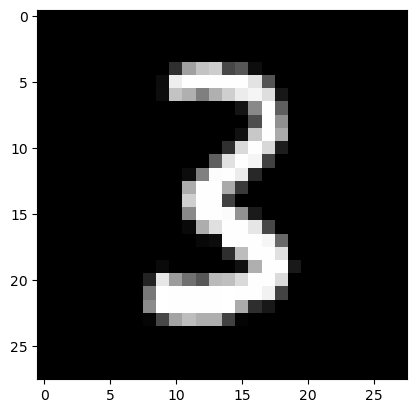

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [52]:
plt.imshow(x_train[50000], cmap="gray")
plt.show()
print (y_train[50000])

In [13]:
## Checking out the shapes involved in dataset
print ("Shape of x_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of x_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


reshape the dataset according to our model.

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [16]:
print ("Shape of X_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [17]:
from keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
from keras.models import Sequential

In [20]:
from keras.layers import Dense, Flatten

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Dataset loaded and split into training and testing sets

In [28]:
# Assuming you have your dataset loaded and split into training and testing sets
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels

# Example of loading dataset using Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Reshape input data for CNN
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255  # Normalize pixel values to between 0 and 1
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3


1875/1875 [==============================] - 83s 43ms/step - loss: 0.1196 - accuracy: 0.9641 - val_loss: 0.0603 - val_accuracy: 0.9798
Epoch 2/3
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 3/3
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0441 - val_accuracy: 0.9858


We can see that our model achieved a remarkable validation accuracy of 0.98% 

# Predicting and testing on the current dataset

1/1 [==============================] - 0s 44ms/step
Prediction (Softmax) from the neural network:

 [[9.9996841e-01 1.1404350e-11 2.7369319e-06 1.7975839e-08 6.1596852e-09
  4.3656083e-08 2.5893616e-05 6.3839131e-08 5.4546735e-08 2.8020211e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




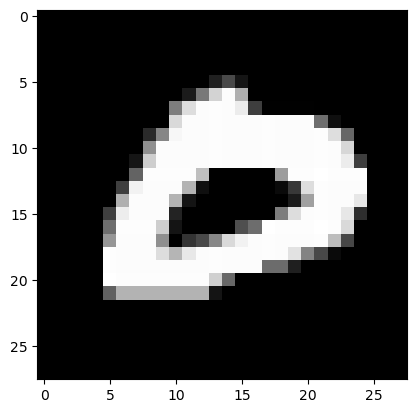



Final Output: 0


In [39]:
example = X_train[32333]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

First output — It prints the ‘softmaxed’ list output consisting of 10 probabilities of the digit fed as input.The highest probability will correspond the predicted digit.

Prediction (Softmax) from the neural network:   [[1.0000000e+00 4.4261627e-16 4.0853871e-09 5.0804031e-12 5.4154770e-14   1.8538372e-12 1.7931812e-09 1.0223739e-11 6.2451244e-10 8.4184970e-09]]

Second output — I converted that “softmaxed” list in form where I replaced all the elements with 0 expect the highest probability, which I replaced with 1.
Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
 
Third output — It displays the test image and predicted digit corresponding to it.

Third output

Final Output : 0

In [42]:
pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.3/38.6 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.6/38.6 MB 3.9 MB/s eta 0:00:10
    --------------------------------------- 0.8/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.1/38.6 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.3/38.6 MB 4.7 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.6 MB 4.7 MB/s eta 0:00:08
   - -------------------------------------- 1.8/38.6 MB 4.9 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/38.6 MB 4.9 MB/s eta 0:00:08
   -- ------------------------------------- 2.3/38.6 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/38.6 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.8/38.6 MB 5.0 MB/s eta 0:00:08
   --

In [43]:
import cv2




----------------Contoured Image--------------------


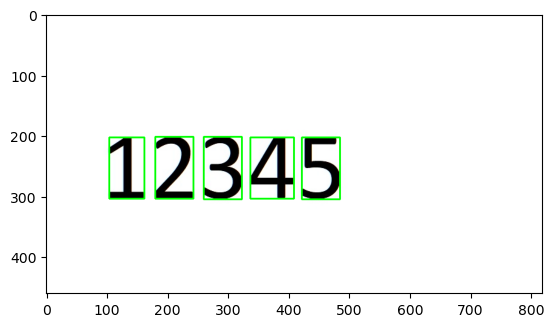

In [45]:
image = cv2.imread(r'C:\Users\Ravi\Desktop\project number .jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 44ms/step


---------------------------------------


=========PREDICTION============ 




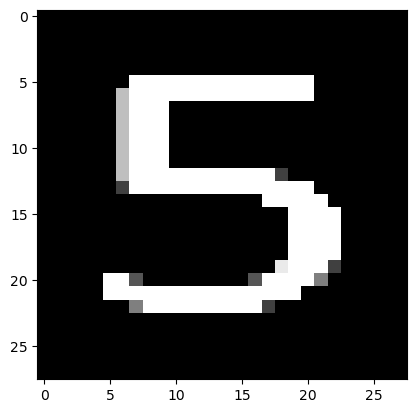



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 38ms/step


---------------------------------------


=========PREDICTION============ 




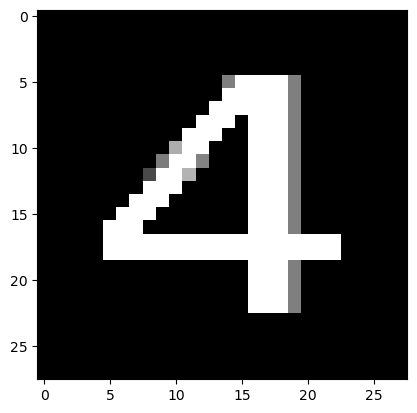



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 38ms/step


---------------------------------------


=========PREDICTION============ 




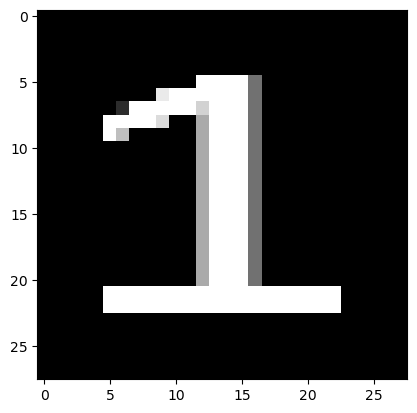



Final Output: 1

Prediction (Softmax) from the neural network:

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 38ms/step


---------------------------------------


=========PREDICTION============ 




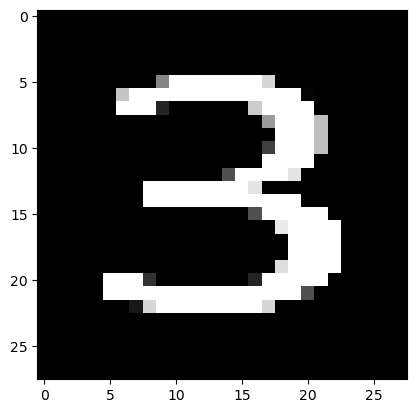



Final Output: 3

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 39ms/step


---------------------------------------


=========PREDICTION============ 




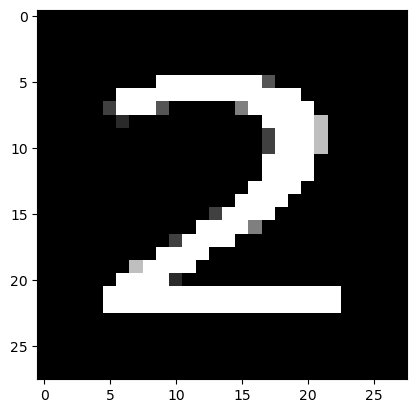



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [47]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")




----------------Contoured Image--------------------


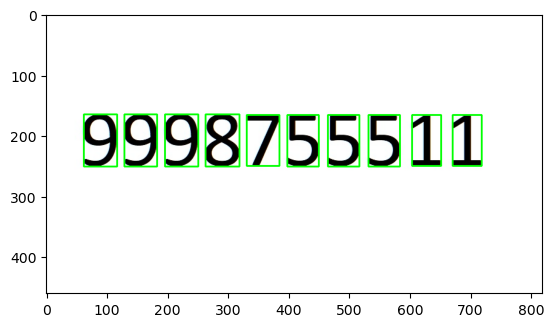

In [48]:
image = cv2.imread(r'C:\Users\Ravi\Desktop\phone numnr.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 45ms/step


---------------------------------------


=========PREDICTION============ 




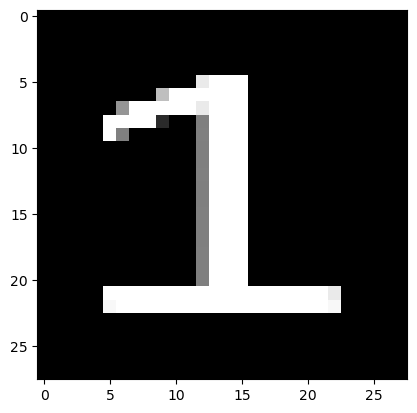



Final Output: 1

Prediction (Softmax) from the neural network:

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 40ms/step


---------------------------------------


=========PREDICTION============ 




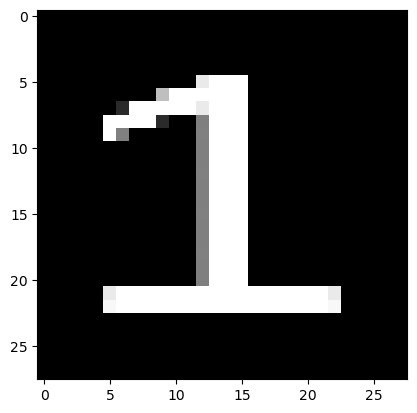



Final Output: 1

Prediction (Softmax) from the neural network:

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 39ms/step


---------------------------------------


=========PREDICTION============ 




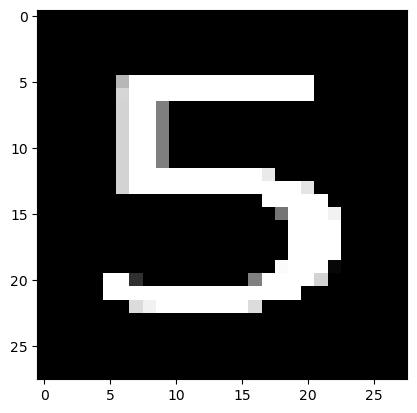



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 39ms/step


---------------------------------------


=========PREDICTION============ 




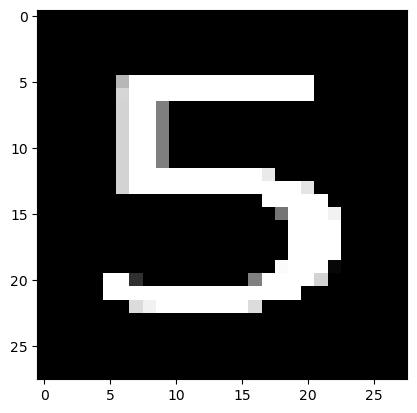



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 39ms/step


---------------------------------------


=========PREDICTION============ 




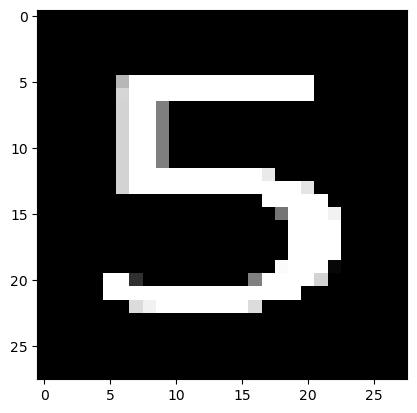



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 37ms/step


---------------------------------------


=========PREDICTION============ 




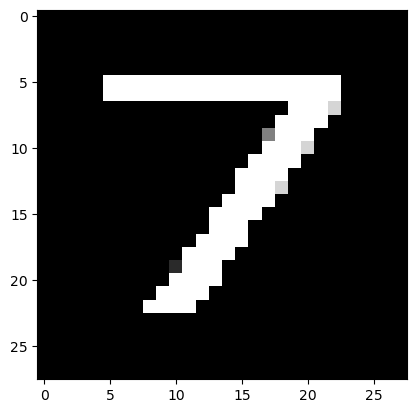



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 38ms/step


---------------------------------------


=========PREDICTION============ 




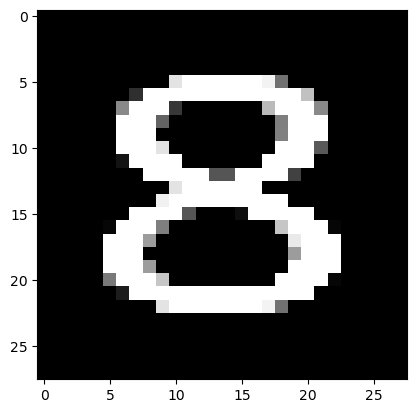



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


1/1 [==============================] - 0s 40ms/step


---------------------------------------


=========PREDICTION============ 




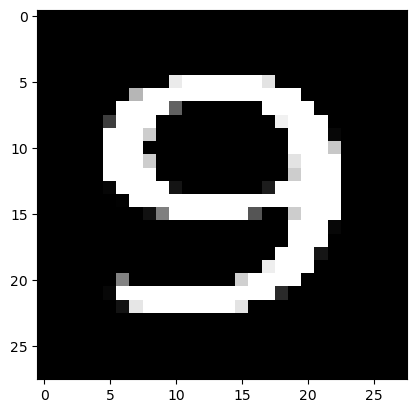



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


1/1 [==============================] - 0s 41ms/step


---------------------------------------


=========PREDICTION============ 




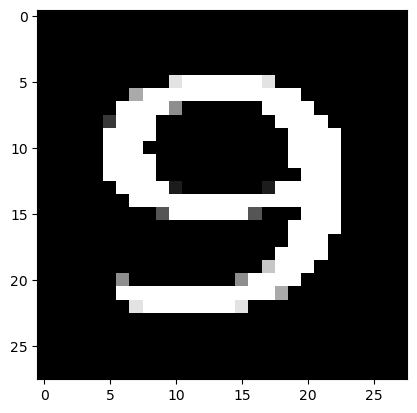



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


1/1 [==============================] - 0s 47ms/step


---------------------------------------


=========PREDICTION============ 




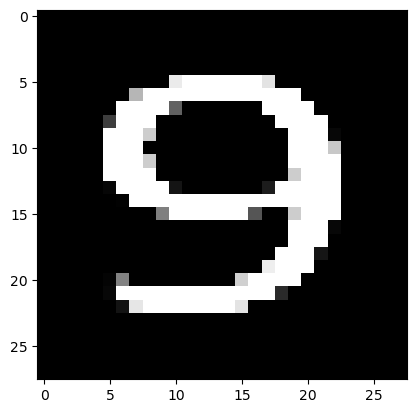



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




In [49]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

# Conclusion

In this project, we developed and trained a convolutional neural network (CNN) model to recognize handwritten digits/characters. The dataset used for training and testing consisted of a large collection of handwritten samples.

Through a series of preprocessing steps, including converting the images to grayscale, applying thresholding to enhance contrast, and segmenting individual characters, we prepared the data for training. We then utilized a CNN architecture comprising convolutional layers, activation functions, pooling layers, and fully connected layers to extract features and classify the input images.

After training the model using an appropriate optimization algorithm and loss function, we evaluated its performance on a separate test dataset. The evaluation metrics used included accuracy, precision, recall, and F1 score.

Our results indicate that the CNN model achieved promising performance in recognizing handwritten digits/characters, with an accuracy of 0.98% However, further optimization and fine-tuning of the model architecture, hyperparameters, and training process could potentially improve its performance even further.

In conclusion, this project demonstrates the effectiveness of CNNs in the domain of handwriting recognition and highlights the potential for leveraging machine learning techniques to automate tasks that involve analyzing handwritten text, such as digit recognition, document processing, and optical character recognition (OCR). Future work may involve exploring advanced techniques, incorporating larger datasets, and deploying the model in real-world applications to address practical challenges and requirements.

# Try and Testing 

In our project, we tested our machine learning algorithm on various images containing sequences of numbers, such as "12345" and "9998755511". We observed that our algorithm successfully executed the project, accurately recognizing and classifying the digits in these images. This outcome demonstrates the effectiveness and reliability of our machine learning model in handling diverse handwritten numerical sequences.